# Análisis de los resultados obtenidos

 Una vez obtenidos los resultados a todas las respuestas,procedemos a analizar y sacar conclusiones de los resultados obtenidos.
 Para ello, vamos a usar la libreria pandas de python que nos ayudará a manipular y analizar los datos


* ### Carga de los JSON en Dataframe

In [42]:
import json
import matplotlib.pyplot as plt
import pandas as pd

ruta_archivo_json_preguntas = './preguntas.json'
ruta_archivo_json_respuestas = './respuestas.json'
ruta_archivo_json_resultados = './resultados.json'

# Carga JSON preguntas

with open(ruta_archivo_json_preguntas) as archivo_json:
    datos_json = json.load(archivo_json)

preguntas = pd.DataFrame(datos_json)
preguntas = preguntas.drop(columns='id')
# Carga JSON respuestas

with open(ruta_archivo_json_respuestas) as archivo_json:
    datos_json = json.load(archivo_json)

respuestas = pd.DataFrame(datos_json)
respuestas = respuestas.drop(columns=['id_respuesta', 'id_pregunta'])
# Carga JSON resultados

with open(ruta_archivo_json_resultados) as archivo_json:
    datos_json = json.load(archivo_json)

valoracion = pd.DataFrame(datos_json)
valoracion = valoracion.drop(columns=['id_respuesta', 'id_pregunta'])

# Unir los tres DataFrames en uno solo
resultados = pd.concat([preguntas, respuestas, valoracion], axis=1)

## RESULTADOS GENERALES

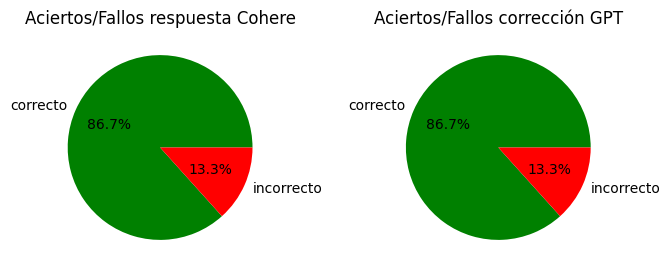

In [53]:
# Calcular la proporción de respuestas correctas e incorrectas
proporcionesCohere = resultados['resultado'].value_counts(normalize=True)
proporcionesGPT = resultados['revision'].value_counts(normalize=True)

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Crear el gráfico circular en el segundo subplot
axs[0].pie(proporcionesCohere.values, labels=proporcionesCohere.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0].set_title('Aciertos/Fallos respuesta Cohere')

axs[1].pie(proporcionesGPT.values, labels=proporcionesGPT.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[1].set_title('Aciertos/Fallos corrección GPT')

plt.show()

## RESULTADOS CULTURA GENERAL

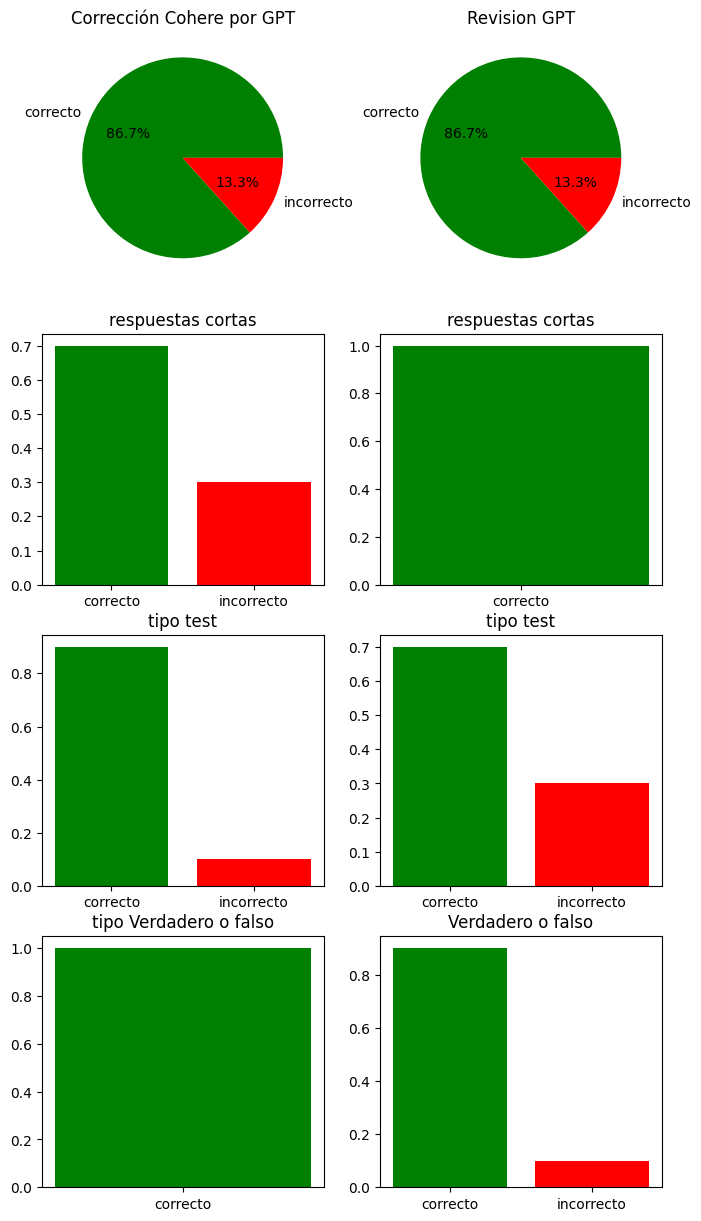

In [75]:
# Calcular la proporción de respuestas correctas e incorrectas
general = resultados.loc[(resultados['tema'] == 'cultura general')]
corta = resultados.loc[(resultados['tema'] == 'cultura general') & (resultados['tipo'] == 'respuesta corta')]
tets = resultados.loc[(resultados['tema'] == 'cultura general') & (resultados['tipo'] == 'test con 3 opciones')]
vof = resultados.loc[(resultados['tema'] == 'cultura general') & (resultados['tipo'] == 'verdadero o falso')]

proporcionesCohere = general['resultado'].value_counts(normalize=True)
proporcionesGPT = general['revision'].value_counts(normalize=True)

proporcionesCohereCorta = corta['resultado'].value_counts(normalize=True)
proporcionesCohereTest = tets['resultado'].value_counts(normalize=True)
proporcionesCohereVof = vof['resultado'].value_counts(normalize=True)

proporcionesGPTCorta = corta['revision'].value_counts(normalize=True)
proporcionesGPTTest = tets['revision'].value_counts(normalize=True)
proporcionesGPTVof = vof['revision'].value_counts(normalize=True)

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(4, 2, figsize=(8, 15))

# Crear el gráfico circular en el segundo subplot
axs[0][0].pie(proporcionesCohere.values, labels=proporcionesCohere.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][0].set_title('Corrección Cohere por GPT')

axs[0][1].pie(proporcionesGPT.values, labels=proporcionesGPT.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0][1].set_title('Revision GPT')

axs[1][0].bar(proporcionesCohereCorta.index, proporcionesCohereCorta.values, color=['green', 'red'])
axs[1][0].set_title('respuestas cortas')

axs[1][1].bar(proporcionesGPTCorta.index, proporcionesGPTCorta.values, color=['green', 'red'])
axs[1][1].set_title('respuestas cortas')

axs[2][0].bar(proporcionesCohereTest.index, proporcionesCohereTest.values, color=['green', 'red'])
axs[2][0].set_title('tipo test')

axs[2][1].bar(proporcionesGPTTest.index, proporcionesGPTTest.values, color=['green', 'red'])
axs[2][1].set_title('tipo test')

axs[3][0].bar(proporcionesCohereVof.index, proporcionesCohereVof.values, color=['green', 'red'])
axs[3][0].set_title('tipo Verdadero o falso')

axs[3][1].bar(proporcionesGPTVof.index, proporcionesGPTVof.values, color=['green', 'red'])
axs[3][1].set_title('Verdadero o falso')

plt.show()